In [1]:
import pandas as pd

In [3]:
gwan_df = pd.read_csv('datas/gwan.csv', encoding='cp949')

In [5]:
gwan_df.head()

,행정구역,2024년_계_총인구수,2024년_계_연령구간인구수,2024년_계_0~9세,2024년_계_10~19세,2024년_계_20~29세,2024년_계_30~39세,2024년_계_40~49세,2024년_계_50~59세,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상
0,서울특별시 관악구 (1162000000),"477,812","477,812","15,023","24,096","103,855","90,812","59,200","65,224","60,569","38,976","18,024","1,983",50
1,서울특별시 관악구 보라매동(1162052500),"23,337","23,337",784,"1,236","4,226","4,127","2,980","3,277","3,354","2,187","1,030",133,3
2,서울특별시 관악구 청림동(1162054500),"14,547","14,547",997,"1,014","1,589","2,367","2,174","2,300","2,036","1,277",688,103,2
3,서울특별시 관악구 성현동(1162056500),"27,922","27,922","1,467","2,517","3,462","3,477","4,250","4,765","3,966","2,613","1,272",128,5
4,서울특별시 관악구 행운동(1162057500),"28,683","28,683",794,"1,228","7,292","6,204","3,345","3,382","3,231","2,172",939,94,2


In [6]:
drop_cols = ['2024년_계_총인구수', '2024년_계_연령구간인구수', '2024년_계_0~9세', '2024년_계_10~19세', '2024년_계_20~29세', '2024년_계_30~39세', '2024년_계_40~49세', '2024년_계_50~59세']
gwan_df_clean = gwan_df.drop(columns=drop_cols)

In [7]:
gwan_df_clean

,행정구역,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상
0,서울특별시 관악구 (1162000000),"60,569","38,976","18,024","1,983",50
1,서울특별시 관악구 보라매동(1162052500),"3,354","2,187","1,030",133,3
2,서울특별시 관악구 청림동(1162054500),"2,036","1,277",688,103,2
3,서울특별시 관악구 성현동(1162056500),"3,966","2,613","1,272",128,5
4,서울특별시 관악구 행운동(1162057500),"3,231","2,172",939,94,2
5,서울특별시 관악구 낙성대동(1162058500),"1,383",920,501,52,2
6,서울특별시 관악구 청룡동(1162059500),"3,374","2,312",995,118,3
7,서울특별시 관악구 은천동(1162060500),"4,359","2,933","1,319",142,3
8,서울특별시 관악구 중앙동(1162061500),"1,613","1,137",586,55,1
9,서울특별시 관악구 인헌동(1162062500),"2,996","1,972",940,78,2


In [8]:
import os
if not os.path.exists('datas'):
    os.mkdir('ml_datas')
gwan_df_clean.to_csv('datas/gwan_df_clean.csv', index=False)  

In [9]:
gwan_df_clean.dtypes

행정구역               object
2024년_계_60~69세     object
2024년_계_70~79세     object
2024년_계_80~89세     object
2024년_계_90~99세     object
2024년_계_100세 이상     int64
dtype: object

In [10]:
# 합산할 대상 컬럼들
age_columns = [
    '2024년_계_60~69세',
    '2024년_계_70~79세',
    '2024년_계_80~89세',
    '2024년_계_90~99세',
    '2024년_계_100세 이상'
]

# 문자열 -> 쉼표 제거 -> 정수로 변환
for col in age_columns:
    gwan_df_clean[col] = gwan_df_clean[col].astype(str).str.replace(',', '').astype(int)

# 새로운 열 '노령인구_합계' 생성
gwan_df_clean['old_sum'] = gwan_df_clean[age_columns].sum(axis=1)

In [11]:
gwan_df_clean.head()

,행정구역,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상,old_sum
0,서울특별시 관악구 (1162000000),60569,38976,18024,1983,50,119602
1,서울특별시 관악구 보라매동(1162052500),3354,2187,1030,133,3,6707
2,서울특별시 관악구 청림동(1162054500),2036,1277,688,103,2,4106
3,서울특별시 관악구 성현동(1162056500),3966,2613,1272,128,5,7984
4,서울특별시 관악구 행운동(1162057500),3231,2172,939,94,2,6438


In [12]:
gwan_df_clean.dtypes

행정구역               object
2024년_계_60~69세      int64
2024년_계_70~79세      int64
2024년_계_80~89세      int64
2024년_계_90~99세      int64
2024년_계_100세 이상     int64
old_sum             int64
dtype: object

In [16]:
gwan_df_clean.drop(index=0, inplace=True)

In [17]:
gwan_df_clean.head()

,행정구역,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상,old_sum
1,서울특별시 관악구 보라매동(1162052500),3354,2187,1030,133,3,6707
2,서울특별시 관악구 청림동(1162054500),2036,1277,688,103,2,4106
3,서울특별시 관악구 성현동(1162056500),3966,2613,1272,128,5,7984
4,서울특별시 관악구 행운동(1162057500),3231,2172,939,94,2,6438
5,서울특별시 관악구 낙성대동(1162058500),1383,920,501,52,2,2858


In [18]:
gwan_df_clean['행정구역'] = gwan_df_clean['행정구역'].str.replace(r'^.*관악구\s|[\n(].*$', '', regex=True)

In [19]:
gwan_df_clean

,행정구역,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상,old_sum
1,보라매동,3354,2187,1030,133,3,6707
2,청림동,2036,1277,688,103,2,4106
3,성현동,3966,2613,1272,128,5,7984
4,행운동,3231,2172,939,94,2,6438
5,낙성대동,1383,920,501,52,2,2858
6,청룡동,3374,2312,995,118,3,6802
7,은천동,4359,2933,1319,142,3,8756
8,중앙동,1613,1137,586,55,1,3392
9,인헌동,2996,1972,940,78,2,5988
10,남현동,2266,1412,612,75,2,4367


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


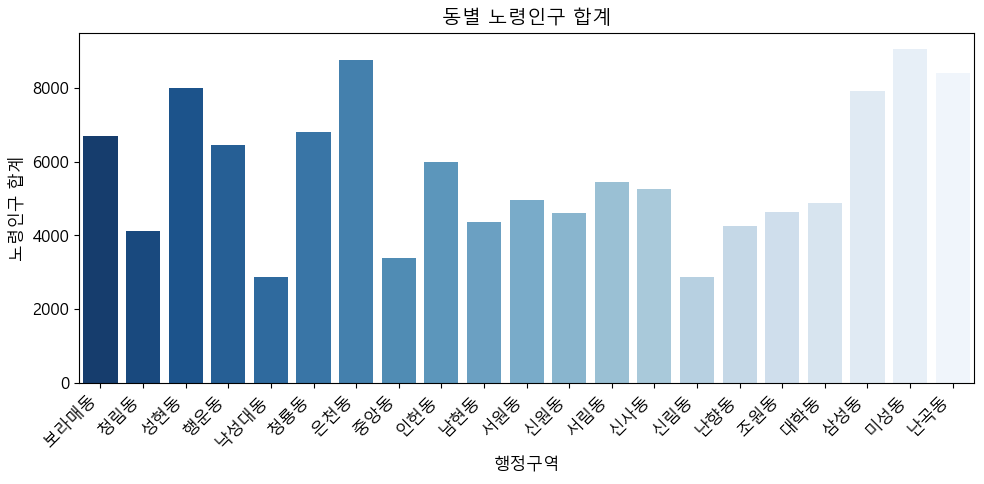

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 DataFrame은 이미 있다고 가정하고 바로 시각화
plt.figure(figsize=(10, 5))

# 막대그래프 그리기
sns.barplot(data=gwan_df_clean, x='행정구역', y='old_sum', palette='Blues_r')

# x축 라벨 회전 (글자 겹침 방지)
plt.xticks(rotation=45, ha='right')

# 그래프 제목/라벨 설정
plt.title('동별 노령인구 합계', fontsize=14)
plt.ylabel('노령인구 합계')
plt.xlabel('행정구역')

plt.tight_layout()
plt.show()


In [ ]:
gwan_df_clean['행정구역'] = gwan_df_clean['행정구역'].str.replace(r'\n?\(.*\)', '', regex=True)
gwan_df_clean['행정구역'] = gwan_df_clean['행정구역'].replace({'서울특별시': '서울시'})